# AirBnB Data Analysis

## Buisness Understanding

In this notebook I'm using AirBnB data downloaded from kaggle, the data are about two cities [Seattle](https://www.kaggle.com/airbnb/seattle/data) and [Boston](https://www.kaggle.com/airbnb/boston), I'll use pandas for data wrangling and cleaning and matplotlib for data visualization. Here I'm trying to find an answer for the questions:

    1- What's the prices of properties of different types in Seattle comparing to Boston?
    2- What's the ratings of properties of different types in Seattle comparing to Boston?
    3- How can we predict the property prices in Seattle?
    


## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Gather

In [2]:
# Load data of two cities Seattle & Boston
df_seattle = pd.read_csv("seattle/listings.csv")
df_boston = pd.read_csv("boston/listings.csv")


In [3]:
df_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
df_boston.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [5]:
df_seattle.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [6]:
interested_columns = ["id", "host_response_time", "host_response_rate", "host_is_superhost", "host_has_profile_pic",
                      "host_identity_verified", "neighbourhood_cleansed", "property_type", "room_type", "accommodates",
                      'bathrooms', 'bedrooms', 'beds', "price", "number_of_reviews", "review_scores_rating"]
df_seattle = df_seattle.loc[:, interested_columns]
df_boston = df_boston.loc[:, interested_columns]


In [7]:
df_seattle.shape

(3818, 16)

In [8]:
df_boston.shape

(3585, 16)

In [9]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3818 non-null   int64  
 1   host_response_time      3295 non-null   object 
 2   host_response_rate      3295 non-null   object 
 3   host_is_superhost       3816 non-null   object 
 4   host_has_profile_pic    3816 non-null   object 
 5   host_identity_verified  3816 non-null   object 
 6   neighbourhood_cleansed  3818 non-null   object 
 7   property_type           3817 non-null   object 
 8   room_type               3818 non-null   object 
 9   accommodates            3818 non-null   int64  
 10  bathrooms               3802 non-null   float64
 11  bedrooms                3812 non-null   float64
 12  beds                    3817 non-null   float64
 13  price                   3818 non-null   object 
 14  number_of_reviews       3818 non-null   

In [10]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      3585 non-null   int64  
 1   host_response_time      3114 non-null   object 
 2   host_response_rate      3114 non-null   object 
 3   host_is_superhost       3585 non-null   object 
 4   host_has_profile_pic    3585 non-null   object 
 5   host_identity_verified  3585 non-null   object 
 6   neighbourhood_cleansed  3585 non-null   object 
 7   property_type           3582 non-null   object 
 8   room_type               3585 non-null   object 
 9   accommodates            3585 non-null   int64  
 10  bathrooms               3571 non-null   float64
 11  bedrooms                3575 non-null   float64
 12  beds                    3576 non-null   float64
 13  price                   3585 non-null   object 
 14  number_of_reviews       3585 non-null   

In [11]:
df_seattle.sample(5)

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
2027,609421,within an hour,100%,f,t,t,Greenwood,House,Private room,4,1.0,1.0,3.0,$280.00,2,90.0
521,6490453,within a day,100%,f,t,t,Green Lake,House,Private room,2,1.0,1.0,1.0,$140.00,14,97.0
2762,8116395,within a few hours,100%,f,t,t,Broadway,Apartment,Entire home/apt,2,1.0,1.0,1.0,$119.00,17,91.0
3759,7821351,within a day,80%,f,t,f,Fremont,Townhouse,Entire home/apt,3,1.5,2.0,2.0,$150.00,2,100.0
3621,8924032,within a day,100%,f,t,f,Stevens,Apartment,Entire home/apt,2,1.0,1.0,1.0,$95.00,1,100.0


In [12]:
df_seattle.isnull().sum()

id                          0
host_response_time        523
host_response_rate        523
host_is_superhost           2
host_has_profile_pic        2
host_identity_verified      2
neighbourhood_cleansed      0
property_type               1
room_type                   0
accommodates                0
bathrooms                  16
bedrooms                    6
beds                        1
price                       0
number_of_reviews           0
review_scores_rating      647
dtype: int64

In [13]:
df_boston.isnull().sum()

id                          0
host_response_time        471
host_response_rate        471
host_is_superhost           0
host_has_profile_pic        0
host_identity_verified      0
neighbourhood_cleansed      0
property_type               3
room_type                   0
accommodates                0
bathrooms                  14
bedrooms                   10
beds                        9
price                       0
number_of_reviews           0
review_scores_rating      813
dtype: int64

In [14]:
df_seattle["property_type"].unique()

array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent', nan],
      dtype=object)

In [15]:
df_seattle["host_response_time"].unique()

array(['within a few hours', 'within an hour', nan, 'within a day',
       'a few days or more'], dtype=object)

### Assess
- null values in review_scores_rating column
- null values in property_type column
- many columns seems to have no relation with price
- columns 'host_response_rate' and 'price' are strings
- null values in columns 'host_response_rate', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'bathrooms', 'bedrooms', 'beds', and 'review_scores_rating'
- columns 'host_is_superhost', 'host_has_profile_pic',	'host_identity_verified' are strings
- columns 'neighbourhood_cleansed', 'property_type', 'room_type' are categorical

## Prepare Data

### Clean
- set null values to 'within an hour' in column 'host_response_time' 
- extract the number from columns 'host_response_rate' and 'price' then convert to int
- replace null values with 100 in 'host_response_rate'
- replace 't' and 'f' with 1 and 0 in columns 'host_is_superhost', 'host_has_profile_pic',	'host_identity_verified'
- encode values of column 'host_response_time'
- replace null values with 'f' in columns 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'
- replace null values with 'Other' in column 'property_type'
- drop rows with null in columns 'bathrooms', 'bedrooms', 'beds'
- replace null values with 0 at column 'review_scores_rating'
- create dumy columns for 'neighbourhood_cleansed', 'property_type', 'room_type'
- remove outliers from price column

In [16]:
def extract_number(df, column):
    """
    extract the number from a string column and return new float column
    
    arguments:
    df (DataFrame): pandas DataFrame contains the data
    column (str): the name of the column to extraxt number from
    
    returns: new float column (pandas Series)
    """
    return df[column].str.extract("(\d+)").astype(float)


In [17]:
# converting the price column to a number
df_seattle["price"] = extract_number(df_seattle, "price")
df_boston["price"] = extract_number(df_boston, "price")

# converting the host_response_rate column to a number
df_seattle["host_response_rate"] = extract_number(df_seattle, "host_response_rate")
df_boston["host_response_rate"] = extract_number(df_boston, "host_response_rate")

In [18]:
def replace_nulls(df, column, new_value):
    """
    replace the null values in the column named 'column' in the DataFrame 'df'
    with the 'new_value'
    
    arguments:
    df (DataFrame): pandas DataFrame contains the data
    column (str): the name of the column that have null values
    new_value (any): the value to replace nulls
    
    returns: pandas DataFrame after replace
    """
    mask = df[column].isnull()
    df.loc[mask, column] = new_value
    
    return df
    

In [19]:
# replace null values with Other as it represent nutral value
df_seattle = replace_nulls(df_seattle, "property_type", "Other")
df_boston = replace_nulls(df_boston, "property_type", "Other")


In [20]:
def remove_null_rows(df, columns):
    """
    remove the rows with null values in the columns 'columns' in the DataFrame 'df'
    
    arguments:
    df (DataFrame): pandas DataFrame contains the data
    columns (list[str]): the list of columns that have null values
    
    returns: pandas DataFrame after removing rows
    """
    mask = False
    for column in columns:
        mask |= df[column].isnull()
    
    return df[~mask]
    

In [21]:
# drop the rows with nulls in columns 'bathrooms', 'bedrooms', and 'beds' as it's just few rows 
# and have no reasonable replacing value
columns = ["bathrooms", "bedrooms", "beds"]

df_seattle = remove_null_rows(df_seattle, columns)
df_boston = remove_null_rows(df_boston, columns)


In [22]:
# Anyone with no reviews considered to have review of zero
df_seattle = replace_nulls(df_seattle, "review_scores_rating", 0)
df_boston = replace_nulls(df_boston, "review_scores_rating", 0)


In [23]:
# consider no response as no message recieved so we repalced with the minimum value 
df_seattle = replace_nulls(df_seattle, "host_response_time", "within an hour")
df_boston = replace_nulls(df_boston, "host_response_time", "within an hour")


# if host recived no message consider response rate 100%
df_seattle = replace_nulls(df_seattle, "host_response_rate", 100)
df_boston = replace_nulls(df_boston, "host_response_rate", 100)

# if host_is_superhost is null, then consider that it's not ('f')
df_seattle = replace_nulls(df_seattle, "host_is_superhost", "f")
df_boston = replace_nulls(df_boston, "host_is_superhost", "f")

# if host_has_profile_pic is null, then consider that it has no picture ('f')
df_seattle = replace_nulls(df_seattle, "host_has_profile_pic", "f")
df_boston = replace_nulls(df_boston, "host_has_profile_pic", "f")

# if host_identity_verified is null, then consider that it's not ('f')
df_seattle = replace_nulls(df_seattle, "host_identity_verified", "f")
df_boston = replace_nulls(df_boston, "host_identity_verified", "f")



In [24]:
# Create two DataFrames for the columns needed to answer the first two questions
df_seattle_stat = df_seattle.loc[:, ["id", "property_type", "price", "review_scores_rating"]]
df_boston_stat = df_boston.loc[:, ["id", "property_type", "price", "review_scores_rating"]]

In [25]:
def encode_categorical_data(df, columns, codes_dict):
    """
    replaces the categorical values in the <columns> with the
    crosponding numerical values from the <codes_dict>
    
    arguments:
    df (DataFrame): pandas DataFrame contains the data
    columns (list[str]): list of the columns names
    codes_dict (dict[str:number]): dictionary maps the categorical values to numeric values
    
    returns: pandas DataFrame after replace
    """
    df.loc[:, columns] = df.loc[:, columns].replace(codes_dict)
    return df


In [26]:
# encode 'f' with 0 and 't' with 1
df_seattle = encode_categorical_data(df_seattle, ["host_is_superhost", "host_has_profile_pic", "host_identity_verified"], {"f": 0, "t": 1})
df_boston = encode_categorical_data(df_boston, ["host_is_superhost", "host_has_profile_pic", "host_identity_verified"], {"f": 0, "t": 1})

# encode ordinal categorical data with numbers matching their order
response_dict = {"within an hour": 1, "within a few hours": 2, "within a day": 3, "a few days or more": 4}

df_seattle = encode_categorical_data(df_seattle, ["host_response_time"], response_dict)
df_boston = encode_categorical_data(df_boston, ["host_response_time"], response_dict)


In [27]:
# replace other categorical data with dummy variables
df_seattle = pd.get_dummies(df_seattle, columns=["neighbourhood_cleansed", "property_type", "room_type"])
df_boston = pd.get_dummies(df_boston, columns=["neighbourhood_cleansed", "property_type", "room_type"])


## Test
 - that null values has been replaces
 - All categorical data are converted to numbers

In [28]:
df_seattle.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3796 entries, 0 to 3817
Data columns (total 119 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id                                                3796 non-null   int64  
 1   host_response_time                                3796 non-null   int64  
 2   host_response_rate                                3796 non-null   float64
 3   host_is_superhost                                 3796 non-null   int64  
 4   host_has_profile_pic                              3796 non-null   int64  
 5   host_identity_verified                            3796 non-null   int64  
 6   accommodates                                      3796 non-null   int64  
 7   bathrooms                                         3796 non-null   float64
 8   bedrooms                                          3796 non-null   float64
 9   beds              

In [29]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 54 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              3557 non-null   int64  
 1   host_response_time                              3557 non-null   int64  
 2   host_response_rate                              3557 non-null   float64
 3   host_is_superhost                               3557 non-null   int64  
 4   host_has_profile_pic                            3557 non-null   int64  
 5   host_identity_verified                          3557 non-null   int64  
 6   accommodates                                    3557 non-null   int64  
 7   bathrooms                                       3557 non-null   float64
 8   bedrooms                                        3557 non-null   float64
 9   beds                                     

In [30]:
df_seattle.sample(5)

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,...,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
2104,8759443,2,100.0,0,1,1,2,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
3777,5787922,2,100.0,0,1,1,4,1.0,1.0,2.0,...,0,0,1,0,0,0,0,1,0,0
2159,8446766,1,100.0,0,1,0,3,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
1874,8342968,1,100.0,0,1,0,2,1.0,1.0,1.0,...,1,0,0,0,0,0,0,0,1,0
2591,6032726,2,100.0,0,1,1,9,3.5,5.0,5.0,...,1,0,0,0,0,0,0,1,0,0


In [31]:
df_boston.sample(5)

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,...,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
2061,14122467,1,100.0,0,1,1,2,1.0,1.0,1.0,...,0,0,0,0,1,0,0,1,0,0
2439,8391298,1,100.0,0,1,1,4,1.0,1.0,2.0,...,0,0,0,0,0,0,0,1,0,0
2087,8792552,1,100.0,0,1,1,7,1.0,2.0,4.0,...,0,0,0,0,0,0,0,1,0,0
1146,1200502,2,100.0,0,1,1,2,1.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2985,3394437,3,100.0,0,1,0,6,3.0,3.0,3.0,...,0,0,1,0,0,0,0,1,0,0


In [32]:
def aggregate_data(df, group_column, stat_dict, col_names):
    """
    group DataFrame 'df' using the column 'group_column' and calculate the statistics
    in dictionary 'stat_dict' and rename the columns 'col_names'
    
    arguments:
    df (DataFrame): pandas DataFrame contains the data
    group_column (str): the name of the column to group by
    stat_dict (dict): the statistics dictionary
    col_names (list): list of the new column names
    
    returns: DataFrame with statistics calculated over the grouping column
    """
    df = df.groupby(group_column, as_index=False).agg(stat_dict)
    df.columns = col_names
    
    return df

## Data Modeling

In [33]:
from sklearn.model_selection import train_test_split

X = df_seattle.drop(["id", "price"], axis=1)

y = df_seattle["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)


In [34]:
from sklearn.svm import SVR

reg = SVR(kernel="linear")
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


In [35]:
reg.score(X_train, y_train)

0.5357222048648533

In [36]:
reg.score(X_test, y_test)

0.5545047561056735

## Evaluation

### Questions 1 & 2:

    1- What's the prices of properties of different types in Seattle comparing to Boston?
    2- What's the ratings of properties of different types in Seattle comparing to Boston?

#### Analyze

In [37]:
stat = {
    "price": "mean",
    "review_scores_rating": "mean",
    "id": "count"
}

columns = ["property_type", "mean_price", "mean_rating", "units_count"]

df_seattle_stat = aggregate_data(df_seattle_stat, "property_type", stat, columns)

df_seattle_stat


,property_type,mean_price,mean_rating,units_count
0,Apartment,122.911661,78.490577,1698
1,Bed & Breakfast,112.054054,67.270270,37
2,Boat,282.375000,59.750000,8
3,Bungalow,115.615385,67.615385,13
4,Cabin,104.666667,96.238095,21
5,Camper/RV,120.461538,73.615385,13
6,Chalet,135.000000,96.000000,1
7,Condominium,151.109890,72.274725,91
8,Dorm,39.500000,90.000000,2
9,House,131.894370,80.025537,1723


In [38]:
df_boston_stat = aggregate_data(df_boston_stat, "property_type", stat, columns)

df_boston_stat

,property_type,mean_price,mean_rating,units_count
0,Apartment,175.412423,69.456790,2592
1,Bed & Breakfast,131.000000,66.871795,39
2,Boat,268.833333,83.833333,12
3,Camper/RV,60.000000,0.000000,1
4,Condominium,190.246753,72.372294,231
5,Dorm,62.500000,86.500000,2
6,Entire Floor,122.000000,25.000000,4
7,Guesthouse,289.000000,100.000000,1
8,House,128.149281,78.510791,556
9,Loft,185.410256,79.025641,39


In [39]:
df_merge = df_seattle_stat.merge(df_boston_stat, how="inner", on="property_type", suffixes=("_seattle", "_boston"))
df_merge

,property_type,mean_price_seattle,mean_rating_seattle,units_count_seattle,mean_price_boston,mean_rating_boston,units_count_boston
0,Apartment,122.911661,78.490577,1698,175.412423,69.456790,2592
1,Bed & Breakfast,112.054054,67.270270,37,131.000000,66.871795,39
2,Boat,282.375000,59.750000,8,268.833333,83.833333,12
3,Camper/RV,120.461538,73.615385,13,60.000000,0.000000,1
4,Condominium,151.109890,72.274725,91,190.246753,72.372294,231
5,Dorm,39.500000,90.000000,2,62.500000,86.500000,2
6,House,131.894370,80.025537,1723,128.149281,78.510791,556
7,Loft,135.700000,78.750000,40,185.410256,79.025641,39
8,Other,94.136364,78.590909,22,220.650000,46.900000,20
9,Townhouse,129.457627,65.508475,118,149.037037,80.722222,54


#### Visualize

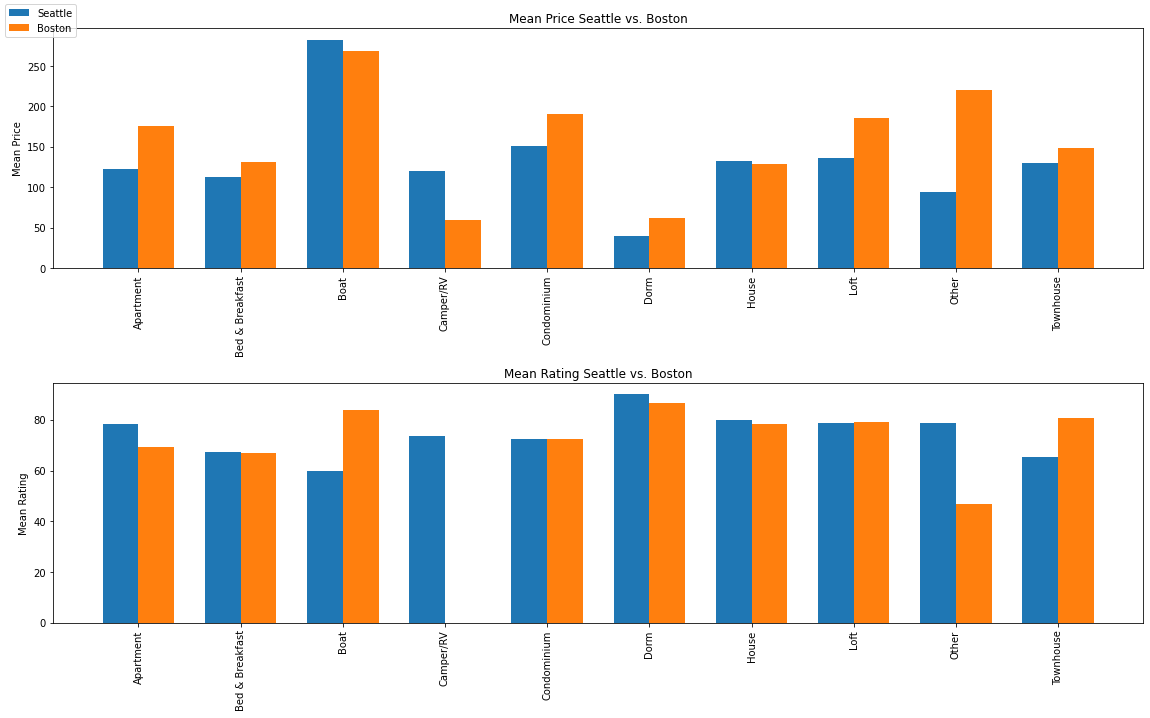

In [40]:
x = np.arange(df_merge.shape[0])
width = 0.35

fig, axs = plt.subplots(2, 1, figsize=(16, 10))

def create_chart(axs, df, column_name):
    """
    draw bar chart using on subplot 'axs' for the values in column 'mean_{column_name}_{city}'
    
    arguments:
    axs : matplotlib subplot object
    df (DataFrame): pandas DataFrame contains the data
    column_name (str): the name of the column to get values from
    
    """
    rect1 = axs.bar(x - width/2, df[f"mean_{column_name}_seattle"], width, label="Seattle")
    rect2 = axs.bar(x + width/2, df[f"mean_{column_name}_boston"], width, label="Boston")

    axs.set_ylabel(f"Mean {column_name.title()}")
    axs.set_title(f"Mean {column_name.title()} Seattle vs. Boston")
    axs.set_xticks(x)
    axs.set_xticklabels(df_merge["property_type"], rotation=90)


create_chart(axs[0], df_merge, "price")
create_chart(axs[1], df_merge, "rating")

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left")
fig.tight_layout()

#### Explanation
> We can conclude that the average prices are higher in Boston except for the property types 'Boat' and 'House', however the two cities have too close rating, if we ignored property types 'Boat' and 'Townhouse' in which Boston have significant higher rating. Seattle has a bit higher rating for property type 'Apartment'

### Question 3:
    - How can we predict the property prices in Seattle?

#### Evaluate

In [41]:
from sklearn.metrics import r2_score, mean_squared_error

print("Model Performance:", round(r2_score(y_test, y_pred), 2))

Model Performance: 0.55


#### Explanation
> It seems hard to expect the prices, however a 0.55 accurate model may give an insight on how the price may be